In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [ ]:
class myCallback(tf.keras.callbacks. Callback):
  def on_epoch_end(self, epochs, logs={}):
    if (logs.get('accuracy')>0.99):
      print('\n your model is getting overfitting')
      self.model.stop_training = True

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-05-20 12:54:43--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.128, 172.217.219.128, 209.85.146.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   120MB/s    in 0.5s    

2021-05-20 12:54:44 (120 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(128,(3,3), activation='relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(256,activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

In [ ]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
train_data = ImageDataGenerator(rescale=1/255.0,
                                width_shift_range = 0.2,
                                height_shift_range = 0.2,
                                shear_range=0.2,
                                horizontal_flip = True,
                                fill_mode = 'nearest')


validation_data = ImageDataGenerator(rescale=1/255.0)

callbacks = myCallback()



train_generator = train_data.flow_from_directory(train_dir,
                                                 target_size = (150,150),
                                                 batch_size = 50,
                                                 class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [ ]:
validation_generator = validation_data.flow_from_directory(validation_dir,
                                                           target_size = (150,150),
                                                           batch_size = 40,
                                                           class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [ ]:
gen = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch = 40,
                    epochs = 50,
                    validation_steps = 25,
                    callbacks = [callbacks])

Epoch 1/50
40/40 [==============================] - 54s 557ms/step - loss: 1.2725 - accuracy: 0.5123 - val_loss: 0.6919 - val_accuracy: 0.5160
Epoch 2/50
40/40 [==============================] - 21s 532ms/step - loss: 0.6915 - accuracy: 0.5253 - val_loss: 0.6829 - val_accuracy: 0.5850
Epoch 3/50
40/40 [==============================] - 21s 530ms/step - loss: 0.7089 - accuracy: 0.5498 - val_loss: 0.6842 - val_accuracy: 0.6320
Epoch 4/50
40/40 [==============================] - 21s 525ms/step - loss: 0.6845 - accuracy: 0.5758 - val_loss: 0.6688 - val_accuracy: 0.5920
Epoch 5/50
40/40 [==============================] - 21s 527ms/step - loss: 0.7376 - accuracy: 0.5729 - val_loss: 0.6751 - val_accuracy: 0.5590
Epoch 6/50
40/40 [==============================] - 21s 528ms/step - loss: 0.6923 - accuracy: 0.5751 - val_loss: 0.7099 - val_accuracy: 0.5600
Epoch 7/50
40/40 [==============================] - 21s 531ms/step - loss: 0.6768 - accuracy: 0.5935 - val_loss: 0.6574 - val_accuracy: 0.6220

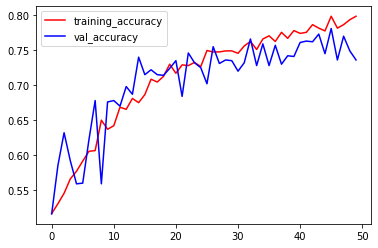

In [ ]:
import matplotlib.pyplot as plt
acc = gen.history['accuracy']
val_acc = gen.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'training_accuracy')
plt.plot(epochs, val_acc, 'b', label = 'val_accuracy')
plt.legend(loc=0)
plt.show()

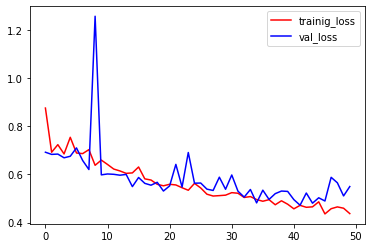

In [ ]:
loss = gen.history['loss']
val_loss = gen.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label = 'trainig_loss')
plt.plot(epochs, val_loss, 'b', label = 'val_loss')
plt.legend(loc=0)
plt.show()

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")